In [1]:
import numpy as np # 
import pandas as pd # 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-eb34c5ba2477>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# load data
df = pd.read_json('resources/News_Category_Dataset_v2.json', lines=True)
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


In [3]:
#drop duplicates
df = df.drop_duplicates(subset='short_description', keep='last')

In [4]:
df=df.reset_index()

In [5]:
# clean the text
import re
import string

def clean_text_round(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    text = re.sub('\d+', '', text)
    text = re.sub('[^\w\s]','', text)  # remove punctuation 
    
    return text

get_cleaning = lambda x: clean_text_round(x)
df.short_description = pd.DataFrame(df.short_description.apply(get_cleaning))
df.short_description = df.short_description.str.replace('\d+', '') # remove numbers

# Gensim

pip install --upgrade gensim

In [6]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
# use gensim to remove stop words
df['short_description'] = df['short_description'].apply(lambda x: gensim.parsing.preprocessing.remove_stopwords(x))


In [8]:
df.short_description[2]

'actor longtime girlfriend anna eberstein tied knot civil ceremony'

In [9]:
remove_words = ['i', 'your', 'you', 'on', 'with', 'and', 'have', 'the', 'to', 'in', 'for', 'that', 'had', 'be', 'a', 'year'
               'it', 'may', 'one', 'as', 'if', 'is', 'via', 'this', 'will', 'david', 'jenni', 'im', 'susan', 'it', 'up',
               'angelica', 'hi', 'hello', 'we', 'our', 'all', 'kelli', 'yes', 'gavin', 'our', 'were', 'of', 'can', 'at',
               'any', 'by', 'also', 'joe', 'ronnie', 'morning', 'evening', 'good', 'what', 'okay', 'ok', 'are', 'us', 'my',
               'th', 'st', 'nd', 'rd', 'was', 'there', 'then', 'lee', 'out', 'or', 'so','alan', 'from','unfortunately',
               'alason', 'but', 'youre', 'does', 'heres', 'little', 'more', 'set', 'br', 'dr', 'ave', 'here', 'about', 'an',
               'let', 'know', 'than', 'then', 'no', 'why', 'way', 'every', 'thats', 'taken', 'today', 'way', 'id', 'isnt', 
               'only', 'bay', 'me', 'when', 'want', 'end', 'month', 'do', 'til', 'get', 'back', 'thanks', 'bonnie', 'woodal',
               'off', 'drive', 'michell','and', 'he','she', 'her','just']

In [10]:
def apply_remove_words_to_texts():
    pat = r'\b(?:{})\b'.format('|'.join(remove_words))
    df["short_description_new"] = df['short_description'].str.replace(pat, '')
    df["short_description_new"] = df['short_description_new'].str.strip()
    return df

In [11]:
df = apply_remove_words_to_texts()

In [12]:
df.head()

,index,category,headline,authors,link,short_description,date,short_description_new
0,0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,left husband killed children day america,2018-05-26,left husband killed children day america
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,course song,2018-05-26,course song
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,actor longtime girlfriend anna eberstein tied knot civil ceremony,2018-05-26,actor longtime girlfriend anna eberstein tied knot civil ceremony
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,actor gives dems asskicking fighting hard donald trump,2018-05-26,actor gives dems asskicking fighting hard donald trump
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,dietland actress said bags cathartic therapeutic moment,2018-05-26,dietland actress said bags cathartic therapeutic moment


# Vader

pip install vaderSentiment

https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [14]:
analyzer = SentimentIntensityAnalyzer()
overall_sentiment = []

for art in df['short_description_new']:
    sentiment_dict=analyzer.polarity_scores(art)
    #print("Overall sentiment dictionary is : ", sentiment_dict) 
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
    #print("Sentence Overall Rated As", end = " ")  
    if sentiment_dict['compound'] >= 0.05 : 
        overall_sentiment.append("Positive")
    elif sentiment_dict['compound'] <= - 0.05 : 
        overall_sentiment.append("Negative")
    else : 
        overall_sentiment.append("Neutral")
        
df['label'] = overall_sentiment

In [15]:
df.head()

,index,category,headline,authors,link,short_description,date,short_description_new,label
0,0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,left husband killed children day america,2018-05-26,left husband killed children day america,Negative
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,course song,2018-05-26,course song,Neutral
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,actor longtime girlfriend anna eberstein tied knot civil ceremony,2018-05-26,actor longtime girlfriend anna eberstein tied knot civil ceremony,Neutral
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,actor gives dems asskicking fighting hard donald trump,2018-05-26,actor gives dems asskicking fighting hard donald trump,Negative
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,dietland actress said bags cathartic therapeutic moment,2018-05-26,dietland actress said bags cathartic therapeutic moment,Neutral


In [16]:
df['category'].value_counts()

POLITICS          29106
WELLNESS          17549
ENTERTAINMENT     13251
TRAVEL            9375 
STYLE & BEAUTY    9152 
PARENTING         8624 
FOOD & DRINK      6206 
QUEER VOICES      5405 
HEALTHY LIVING    5197 
BUSINESS          5060 
COMEDY            4361 
SPORTS            4186 
BLACK VOICES      4064 
HOME & LIVING     4023 
THE WORLDPOST     3657 
WEDDINGS          3645 
PARENTS           3433 
DIVORCE           3401 
IMPACT            3050 
WOMEN             3023 
CRIME             2671 
MEDIA             2259 
WORLD NEWS        2169 
WEIRD NEWS        2152 
GREEN             2034 
TECH              1990 
TASTE             1904 
RELIGION          1779 
SCIENCE           1763 
MONEY             1706 
STYLE             1500 
ARTS & CULTURE    1321 
ENVIRONMENT       1317 
WORLDPOST         1242 
FIFTY             1042 
GOOD NEWS         1027 
LATINO VOICES     1018 
CULTURE & ARTS    1016 
COLLEGE           921  
EDUCATION         891  
ARTS              863  
Name: category, 

News API categories
* business
* entertainment
* general
* health
* science
* sports
* technology

In [17]:
# categories
business =['BUSINESS','MONEY']
entertainment=['ENTERTAINMENT','ARTS','COMEDY','ARTS & CULTURE','CULTURE & ARTS','MEDIA']
health=['HEALTH','WELLNESS','HEALTHY LIVING']
science=['SCIENCE']
sports=['SPORTS']
technology = ['TECH']

In [18]:
condition = df['category'].isin(technology)
technologyDF = df[condition]
technologyDF.shape

(1990, 9)

In [19]:
#save tech data
technologyDF.to_csv("Resources/TechnologyTestData_2.csv")

In [20]:
df.shape

(178353, 9)

In [21]:
X =df # the features we want to analyze
y =df["label"] # the labels, or answers, we want to test against

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#train entire data
X_train_2=X_train["short_description_new"]
y_train_2=y_train

condition = X_test['category'].isin(technology)
technologyDF = X_test[condition]
#test tech data
X_test_2=technologyDF["short_description_new"]
y_test_2=technologyDF["label"]

# Vectorizing the Data

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(X_train_2)
test_vectors = vectorizer.transform(X_test_2)

In [24]:
train_vectors

<124847x21452 sparse matrix of type '<class 'numpy.float64'>'
	with 1171179 stored elements in Compressed Sparse Row format>

In [25]:
train_vectors

<124847x21452 sparse matrix of type '<class 'numpy.float64'>'
	with 1171179 stored elements in Compressed Sparse Row format>

# Creating a Linear SVM Model

In [26]:
import time
# from sklearn import svm
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config

In [27]:
# Perform classification with SVM, kernel=linear
classifier = SVC(kernel='linear')
t0 = time.time()
t1 = time.time()
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
set_config(display="diagram")
#create pipeline
pipe = make_pipeline( classifier)
pipe

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [28]:
# model generation
# classifier.fit(train_vectors, trainData['label'])
pipe.fit(train_vectors, y_train_2)

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [29]:
predicted=pipe.predict(test_vectors)

In [30]:
svm_acc_train=pipe.score(train_vectors, y_train_2)
svm_acc_test=pipe.score(test_vectors, y_test_2)

In [31]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test_2, predicted, output_dict=True)
print(f"Train Accuracy = {svm_acc_train}")
print(f"Test Accuracy = {svm_acc_test}")
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])

Training time: 0.000000s; Prediction time: 0.000000s
Train Accuracy = 0.9406793915752881
Test Accuracy = 0.9211822660098522
positive:  {'precision': 0.9330543933054394, 'recall': 0.9214876033057852, 'f1-score': 0.9272349272349273, 'support': 242}
negative:  {'precision': 0.9032258064516129, 'recall': 0.835820895522388, 'f1-score': 0.8682170542635659, 'support': 134}


In [32]:
#prediction report
from sklearn.metrics import classification_report
print(classification_report(pipe.predict(test_vectors),y_test_2))

              precision    recall  f1-score   support

    Negative       0.84      0.90      0.87       124
     Neutral       0.97      0.92      0.94       246
    Positive       0.92      0.93      0.93       239

    accuracy                           0.92       609
   macro avg       0.91      0.92      0.91       609
weighted avg       0.92      0.92      0.92       609



# Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [33]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#                 "C": [0.1,1,10,100],
#                 "gamma" : [0.0001, 0.001, 0.01, 0.1]
#             }
# svm_grid_model = GridSearchCV(classifier, param_grid)

In [34]:
# # Train the model with GridSearch
# svm_grid_model.fit(train_vectors, y_train_2)

In [35]:
# print(svm_grid_model.best_params_)
# print(svm_grid_model.best_score_)

In [36]:
# svm_grid_acc=svm_grid_model.score(test_vectors, y_test_2)

In [37]:
# from sklearn.metrics import classification_report
# print(classification_report(svm_grid_model.predict(test_vectors),y_test_2))

# Save the Model

In [38]:
import pickle
# pickling the vectorizer
pickle.dump(vectorizer, open('../final_model/vectorizer.sav', 'wb'))
# pickling the model
filename = '../final_model/gensim_svm_model.sav'
pickle.dump(pipe, open(filename, 'wb'))

In [39]:
# import joblib
# joblib.dump(pipe, '../final_model/gensim_svm_model.pkl')

# Test the SVM classifier

In [40]:
# review = """SUPERB, I AM IN LOVE IN THIS PHONE"""
# review_vector = pipe.transform([review]) # vectorizing
# print(classifier_linear.predict(review_vector))

In [41]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


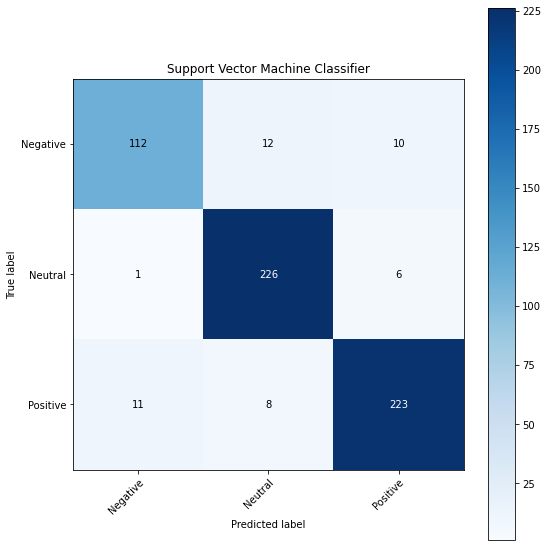

In [46]:

predictions= pipe.predict(test_vectors)
classes = ['Negative','Neutral','Positive']
ax = plot_confusion_matrix(y_test_2, predictions, classes,False,"Support Vector Machine Classifier")
plt.savefig("SVM.png")
ax

In [47]:
pipe.classes

AttributeError: 'Pipeline' object has no attribute 'classes'